In [31]:
import pandas as pd
import numpy as np

#navigate folder
from glob import glob
import os

#plotting 
import matplotlib.pyplot as plt
%matplotlib inline

#to process and open images
import cv2

#to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns',None)

In [32]:
# data_preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#evaluate model and separate train and test
from sklearn.metrics import confusion_matrix

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
#for convolutional neural network
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from keras.preprocessing import image
from keras.utils import np_utils

In [35]:
#Load Images Data

DATA_FOLDER = "Desktop/Kaggle/v2-plant-seedlings-dataset"

In [36]:
os.listdir(DATA_FOLDER)

['Cleavers',
 'Sugar beet',
 'Common Chickweed',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Fat Hen',
 'Common wheat',
 'Black-grass',
 'nonsegmentedv2',
 'Small-flowered Cranesbill',
 'Charlock',
 'Maize']

In [37]:
#Lets walk over the directory structure ,so we understand how images are stored

for class_folder_name in os.listdir(DATA_FOLDER):
    class_folder_path = os.path.join(DATA_FOLDER,class_folder_name)
    for image_path in glob(os.path.join(class_folder_path,"*png")):
        print(image_path)

Desktop/Kaggle/v2-plant-seedlings-dataset/Cleavers/348.png
Desktop/Kaggle/v2-plant-seedlings-dataset/Cleavers/176.png
Desktop/Kaggle/v2-plant-seedlings-dataset/Cleavers/88.png
Desktop/Kaggle/v2-plant-seedlings-dataset/Cleavers/162.png
Desktop/Kaggle/v2-plant-seedlings-dataset/Cleavers/189.png
Desktop/Kaggle/v2-plant-seedlings-dataset/Cleavers/77.png
Desktop/Kaggle/v2-plant-seedlings-dataset/Cleavers/63.png
Desktop/Kaggle/v2-plant-seedlings-dataset/Cleavers/228.png
Desktop/Kaggle/v2-plant-seedlings-dataset/Cleavers/200.png
Desktop/Kaggle/v2-plant-seedlings-dataset/Cleavers/214.png
Desktop/Kaggle/v2-plant-seedlings-dataset/Cleavers/215.png
Desktop/Kaggle/v2-plant-seedlings-dataset/Cleavers/201.png
Desktop/Kaggle/v2-plant-seedlings-dataset/Cleavers/229.png
Desktop/Kaggle/v2-plant-seedlings-dataset/Cleavers/62.png
Desktop/Kaggle/v2-plant-seedlings-dataset/Cleavers/188.png
Desktop/Kaggle/v2-plant-seedlings-dataset/Cleavers/76.png
Desktop/Kaggle/v2-plant-seedlings-dataset/Cleavers/163.png
De

In [38]:
os.path.join(DATA_FOLDER,class_folder_name)

'Desktop/Kaggle/v2-plant-seedlings-dataset/Maize'

In [49]:
#Lets create a dataframe 
#Dataframe consist of path to image and the label

image_df = []

#navigate within each folder
for class_folder_name in os.listdir(DATA_FOLDER):
    class_folder_path = os.path.join(DATA_FOLDER,class_folder_name)
    
    #collect every image path
    for imagepath in glob(os.path.join(class_folder_path,"*.png")):
        tmp = pd.DataFrame([imagepath,class_folder_name]).T
        image_df.append(tmp)
        print(tmp)
        
#concatinate the final DF
images_df = pd.concat(image_df,axis=0,ignore_index=True)
images_df.columns = ["image","target"]

                                                   0         1
0  Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...  Cleavers
                                                   0         1
0  Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...  Cleavers
                                                   0         1
0  Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...  Cleavers
                                                   0         1
0  Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...  Cleavers
                                                   0         1
0  Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...  Cleavers
                                                   0         1
0  Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...  Cleavers
                                                   0         1
0  Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...  Cleavers
                                                   0         1
0  Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...  C

In [51]:
images_df.head(10)

,image,target
0,Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...,Cleavers
1,Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...,Cleavers
2,Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...,Cleavers
3,Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...,Cleavers
4,Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...,Cleavers
5,Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...,Cleavers
6,Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...,Cleavers
7,Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...,Cleavers
8,Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...,Cleavers
9,Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...,Cleavers


In [52]:
images_df["target"].value_counts()

Loose Silky-bent             762
Common Chickweed             713
Scentless Mayweed            607
Small-flowered Cranesbill    576
Fat Hen                      538
Sugar beet                   463
Charlock                     452
Cleavers                     335
Black-grass                  309
Shepherds Purse              274
Maize                        257
Common wheat                 253
Name: target, dtype: int64

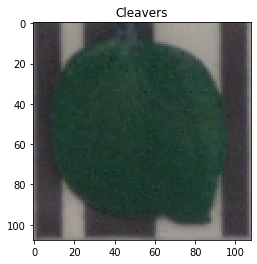

In [62]:
def plot_single_image(df, image_number):
    im = cv2.imread(df.loc[image_number, 'image'])
    plt.title(df.loc[image_number, 'target'])
    plt.imshow(im)
    
plot_single_image(images_df, 10)

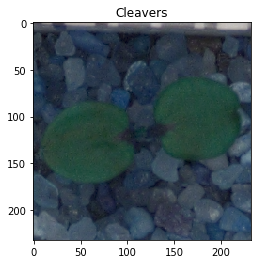

In [63]:
plot_single_image(images_df, 20)

In [68]:
#Plant a bunch of images together to get better feeling of how our images look like

def plot_for_class(df,label):
    rows = 3
    cols = 3
    
    fig,axs = plt.subplots(rows,cols,figsize=(10,10))
    
    n = 0
    for i in range(0,rows):
        for j in range(0,cols):
            tmp = df[df["target"] == label]
            tmp.reset_index(drop=True, inplace=True)
            im = cv2.imread(tmp.loc[n,'image'])
            axs[i,j].imshow(im)
            n += 1

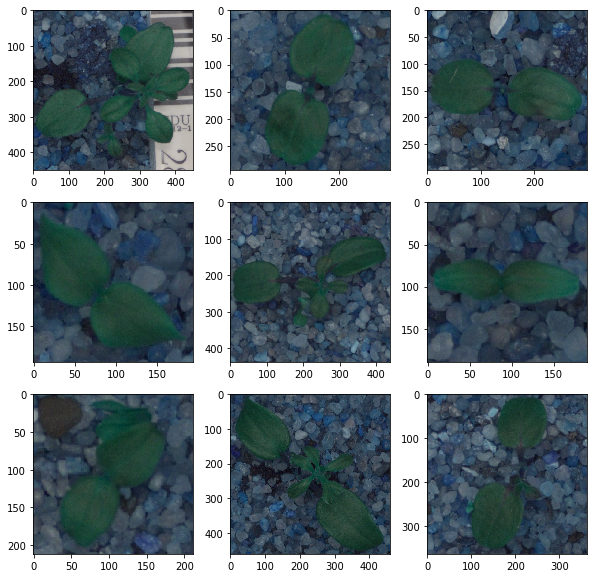

In [69]:
plot_for_class(images_df,"Cleavers")

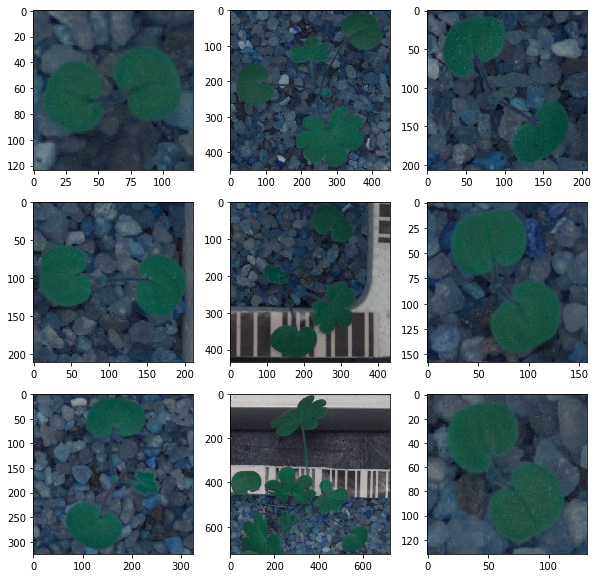

In [70]:
plot_for_class(images_df,"Small-flowered Cranesbill")

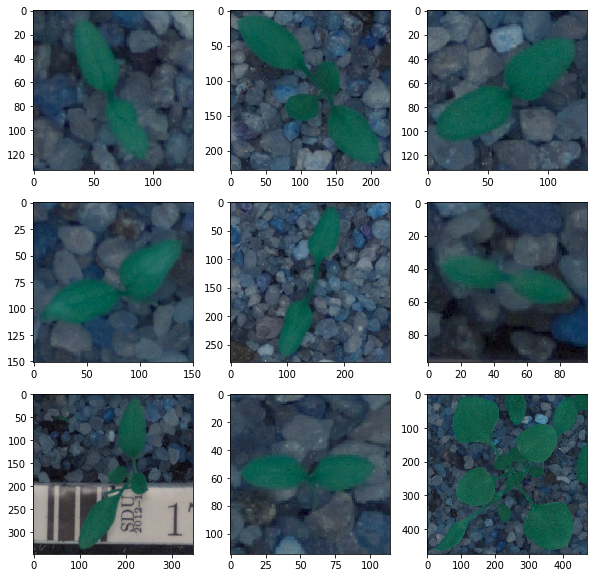

In [72]:
plot_for_class(images_df,"Common Chickweed")

In [73]:
## tarin test split

X_train,X_test,y_train,y_test = train_test_split(images_df["image"],images_df["target"]
                                                 ,test_size=.20,random_state = 101)

In [74]:
print(X_train.shape,X_test.shape)

(4431,) (1108,)


In [75]:
X_train.head()

1922    Desktop/Kaggle/v2-plant-seedlings-dataset/Loos...
4164    Desktop/Kaggle/v2-plant-seedlings-dataset/Blac...
2952    Desktop/Kaggle/v2-plant-seedlings-dataset/Shep...
287     Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...
4971    Desktop/Kaggle/v2-plant-seedlings-dataset/Char...
Name: image, dtype: object

In [76]:
#reset index , as we will be iterating over rows to get and process the images

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
X_train.head()

0    Desktop/Kaggle/v2-plant-seedlings-dataset/Loos...
1    Desktop/Kaggle/v2-plant-seedlings-dataset/Blac...
2    Desktop/Kaggle/v2-plant-seedlings-dataset/Shep...
3    Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...
4    Desktop/Kaggle/v2-plant-seedlings-dataset/Char...
Name: image, dtype: object

In [77]:
X_test.head()

0    Desktop/Kaggle/v2-plant-seedlings-dataset/Shep...
1    Desktop/Kaggle/v2-plant-seedlings-dataset/Clea...
2    Desktop/Kaggle/v2-plant-seedlings-dataset/Maiz...
3    Desktop/Kaggle/v2-plant-seedlings-dataset/Comm...
4    Desktop/Kaggle/v2-plant-seedlings-dataset/Comm...
Name: image, dtype: object

In [78]:
#reset index in target as well

y_train.reset_index(drop=True,inplace = True)
y_test.reset_index(drop=True, inplace = True)

In [79]:
#percentage of images within each class

y_train.value_counts()/len(y_train)

Loose Silky-bent             0.137666
Common Chickweed             0.128639
Scentless Mayweed            0.108328
Small-flowered Cranesbill    0.104717
Fat Hen                      0.095689
Sugar beet                   0.083277
Charlock                     0.081471
Cleavers                     0.060934
Black-grass                  0.057323
Shepherds Purse              0.048070
Common wheat                 0.047168
Maize                        0.046716
Name: target, dtype: float64

In [80]:
#percentage of images within each class

y_test.value_counts()/len(y_test)

Loose Silky-bent             0.137184
Common Chickweed             0.129061
Scentless Mayweed            0.114621
Fat Hen                      0.102888
Small-flowered Cranesbill    0.101083
Sugar beet                   0.084838
Charlock                     0.082130
Cleavers                     0.058664
Shepherds Purse              0.055054
Black-grass                  0.049639
Maize                        0.045126
Common wheat                 0.039711
Name: target, dtype: float64

In [82]:
#We need to label the output so that it will be apple to apple comparision as we have to get response from neural 
#networks

encoder = LabelEncoder()
encoder.fit(y_train)

train_y = np_utils.to_categorical(encoder.transform(y_train))
test_y = np_utils.to_categorical(encoder.transform(y_test))

In [83]:
train_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [84]:
test_y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [87]:
#Resize the image
IMAGE_SIZE = 150

In [90]:
def im_resize(df,n):
    im = cv2.imread(df[n])
    im = cv2.resize(im,(IMAGE_SIZE,IMAGE_SIZE))
    return im

In [92]:
tmp = im_resize(X_train,7)
tmp.shape

(150, 150, 3)

In [93]:
#shpae of dataset needs to be in uniform formet (n1,n2,n3,n4) where n1 is the number of obersvations n2 and n3 are 
#image width and length and n4 indicates that it is a coloured image 

def create_dataset(df,image_size):
    tmp = np.zeros((len(df),image_size,image_size,3),dtype = 'float32')
    
    for n in range(0,len(df)):
        im = im_resize(df,n)
        tmp[n] = im
        
    print(print('Dataset Images shape: {} size: {:,}'.format(tmp.shape, tmp.size)))
    return tmp

In [94]:
x_train = create_dataset(X_train,IMAGE_SIZE)

Dataset Images shape: (4431, 150, 150, 3) size: 299,092,500
None


In [95]:
x_test = create_dataset(X_test,IMAGE_SIZE)

Dataset Images shape: (1108, 150, 150, 3) size: 74,790,000
None


In [98]:
#Build CNN model 

kernel_size = (3,3)
pool_size = (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = .3
dropout_dense = .3

model = Sequential()
model.add(Conv2D(first_filters,kernel_size,activation='relu',input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
#model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
#model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
#model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(12, activation = "softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 34, 34, 64)       

In [99]:
model.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [100]:
batch_size = 10
epochs = 8

In [104]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='acc', factor=0.5, patience=1, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit(x=x_train, y=train_y,
                    batch_size=batch_size, 
                    validation_split=10,
                    epochs=epochs,
                    verbose=2,
                    callbacks=callbacks_list)

Epoch 1/8
 - 163s - loss: 0.1503 - accuracy: 0.9420
Epoch 2/8
 - 162s - loss: 0.1291 - accuracy: 0.9501
Epoch 3/8
 - 159s - loss: 0.1072 - accuracy: 0.9589
Epoch 4/8
 - 164s - loss: 0.0900 - accuracy: 0.9652
Epoch 5/8
 - 172s - loss: 0.0754 - accuracy: 0.9718
Epoch 6/8
 - 171s - loss: 0.0624 - accuracy: 0.9771
Epoch 7/8
 - 167s - loss: 0.0559 - accuracy: 0.9785
Epoch 8/8
 - 160s - loss: 0.0511 - accuracy: 0.9809


<Figure size 432x288 with 0 Axes>

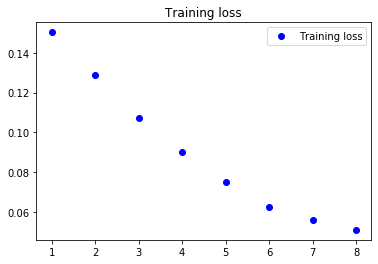

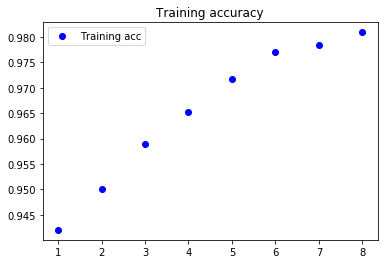

<Figure size 432x288 with 0 Axes>

In [107]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()

In [108]:
predictions = model.predict_classes(x_test,verbose=1)

1108/1108 [==============================] - 10s 9ms/step


In [109]:
#transform target to check confusion matrics
encoder.transform(y_test)
cnf_matrix = confusion_matrix(encoder.transform(y_test), predictions)

In [110]:
from sklearn.metrics import  classification_report

print(classification_report(encoder.transform(y_test), predictions))

              precision    recall  f1-score   support

           0       0.65      0.27      0.38        55
           1       0.77      0.95      0.85        91
           2       0.85      0.85      0.85        65
           3       0.98      0.77      0.86       143
           4       0.69      0.82      0.75        44
           5       0.81      0.88      0.84       114
           6       0.80      0.84      0.82       152
           7       0.93      0.74      0.82        50
           8       0.75      0.77      0.76       127
           9       0.75      0.74      0.74        61
          10       0.88      0.92      0.90       112
          11       0.74      0.88      0.81        94

    accuracy                           0.81      1108
   macro avg       0.80      0.79      0.78      1108
weighted avg       0.81      0.81      0.80      1108



In [111]:
# create a dict to map back the numbers onto the classes

tmp = pd.concat([y_test, pd.Series(encoder.transform(y_test))], axis=1)
tmp.columns = ['class_name', 'class_number']
tmp.drop_duplicates(inplace=True)
tmp.reset_index(drop=True, inplace=True)
tmp = pd.Series(tmp.class_name.values,index=tmp.class_number).to_dict()
tmp

{9: 'Shepherds Purse',
 2: 'Cleavers',
 7: 'Maize',
 3: 'Common Chickweed',
 10: 'Small-flowered Cranesbill',
 11: 'Sugar beet',
 0: 'Black-grass',
 8: 'Scentless Mayweed',
 4: 'Common wheat',
 6: 'Loose Silky-bent',
 5: 'Fat Hen',
 1: 'Charlock'}

In [112]:
# these we will display in the below matrix
abbreviation = ['BG', 'Ch', 'Cl', 'CC', 'CW', 'FH', 'LSB', 'M', 'SM', 'SP', 'SFC', 'SB']

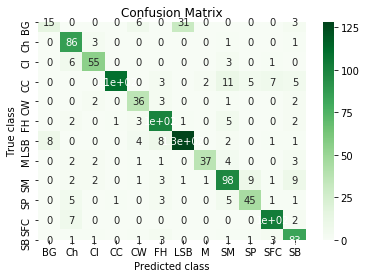

In [113]:
import seaborn as sns

fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
ax.set_xticklabels(abbreviation)
ax.set_yticklabels(abbreviation)
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
#fig.savefig('Confusion matrix.png', dpi=300)
plt.show();

In [114]:
from sklearn.metrics import  accuracy_score


accuracy_score(encoder.transform(y_test), predictions, normalize=True, sample_weight=None)

0.8086642599277978